In [1]:
from scipy.stats.distributions import norm
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from pydataset import data as pydata
from statsmodels.tsa.stattools import arma_order_select_ic as order_select
import pandas as pd
from scipy.stats import multivariate_normal as mn
import itertools

In [2]:
import pickle
import numpy as np
import nltk
with open('/Users/chelsey/Documents/ACME Labs/Project_Vol_3/hurricane-prediction/Data/atlantic_series.pickle','rb') as f:
    atlantic = pickle.load(f)

In [3]:
atlantic[0]

,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS,Status WV
45167,AL012004,ALEX,30.3,78.3,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45168,20040731,1800,30.3,78.3,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45169,20040801,0000,31.0,78.8,25,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45170,20040801,0600,31.5,79.0,25,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45171,20040801,1200,31.6,79.1,30,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45172,20040801,1800,31.6,79.2,35,1009,0,50,50,0,...,0,0,0,0,0,0,0,0,1,0
45173,20040802,0000,31.5,79.3,35,1007,0,50,50,0,...,0,0,0,0,0,0,0,0,1,0
45174,20040802,0600,31.4,79.4,40,1005,60,90,90,0,...,0,0,0,0,0,0,0,0,1,0
45175,20040802,1200,31.3,79.0,50,992,75,90,60,20,...,0,0,0,0,0,0,0,0,1,0
45176,20040802,1800,31.8,78.7,50,993,75,90,50,30,...,0,0,0,0,0,0,0,0,1,0


In [4]:
def arma_forecast_naive(file,title,p=2,q=1,n=20):
    """
    Perform ARMA(1,1) on data. Let error terms be drawn from
    a standard normal and let all constants be 1.
    Predict n values and plot original data with predictions.

    Parameters:
        file (str): data file
        p (int): order of autoregressive model
        q (int): order of moving average model
        n (int): number of future predictions
    """
    #load in data and set variables
    z = np.diff(file[1:].astype(float))
    eps = np.random.normal(0,1,len(z))
    phi, theta = 0.5, 0.1
    zt=[]

    # go through n times
    for t in range(n):
        ar = np.sum([phi*z[t-i] for i in range(1,p+1)])
        ma = np.sum([theta*eps[t-j] for j in range(1,q+1)])
        zt.append(ar + eps[t] + ma)
    return len(z), n, z, zt, p, q

#     #plot
#     domain1 = np.arange(0,len(z))
#     domain2 = np.arange(len(z),len(z)+n)
#     plt.plot(domain1, z, label = 'Old Data')
#     plt.plot(domain2, zt, label = 'New Data')
#     plt.xlabel('Every 6 Hours from Start of Data Collection')
#     plt.ylabel('Changes in ' + title)
#     plt.title('ARMA(' + str(p) + ',' + str(q) + ') Naive Forecast ' + title)
#     plt.legend()
#     plt.show()
    
len_z1, n1, z1, zt1, p1, q1 = arma_forecast_naive(file=atlantic[0]['Longitude'],title='Longitude')
len_z2, n2, z2, zt2, p2, q2 = arma_forecast_naive(file=atlantic[0]['Latitude'],title='Latitude')

In [5]:
atlantic[0]

,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS,Status WV
45167,AL012004,ALEX,30.3,78.3,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45168,20040731,1800,30.3,78.3,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45169,20040801,0000,31.0,78.8,25,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45170,20040801,0600,31.5,79.0,25,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45171,20040801,1200,31.6,79.1,30,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45172,20040801,1800,31.6,79.2,35,1009,0,50,50,0,...,0,0,0,0,0,0,0,0,1,0
45173,20040802,0000,31.5,79.3,35,1007,0,50,50,0,...,0,0,0,0,0,0,0,0,1,0
45174,20040802,0600,31.4,79.4,40,1005,60,90,90,0,...,0,0,0,0,0,0,0,0,1,0
45175,20040802,1200,31.3,79.0,50,992,75,90,60,20,...,0,0,0,0,0,0,0,0,1,0
45176,20040802,1800,31.8,78.7,50,993,75,90,50,30,...,0,0,0,0,0,0,0,0,1,0


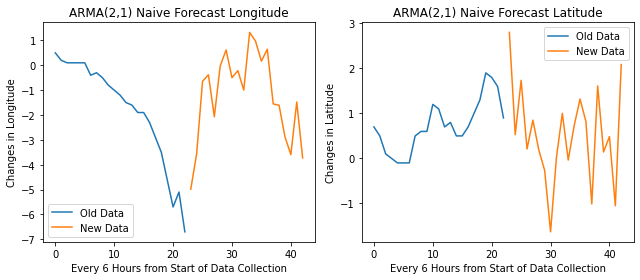

In [6]:
#plot
plt.rcParams["figure.figsize"] = (9,4)
domain1 = np.arange(0,len(z1))
domain2 = np.arange(len(z1),len(z1)+n1)
domain3 = np.arange(0,len(z2))
domain4 = np.arange(len(z2),len(z2)+n2)
plt.subplot(1,2,1)
plt.plot(domain1, z1, label = 'Old Data')
plt.plot(domain2, zt1, label = 'New Data')
plt.xlabel('Every 6 Hours from Start of Data Collection')
plt.ylabel('Changes in Longitude')
plt.title('ARMA(' + str(p1) + ',' + str(q1) + ') Naive Forecast ' + 'Longitude')
plt.legend()

plt.subplot(1,2,2)
plt.plot(domain3, z2, label = 'Old Data')
plt.plot(domain4, zt2, label = 'New Data')
plt.xlabel('Every 6 Hours from Start of Data Collection')
plt.ylabel('Changes in Latitude')
plt.title('ARMA(' + str(p2) + ',' + str(q2) + ') Naive Forecast ' + 'Latitude')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from sklearn.model_selection import train_test_split

In [20]:
atlantic[0]

,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS,Status WV
45167,AL012004,ALEX,30.3,78.3,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45168,20040731,1800,30.3,78.3,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45169,20040801,0000,31.0,78.8,25,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45170,20040801,0600,31.5,79.0,25,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45171,20040801,1200,31.6,79.1,30,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45172,20040801,1800,31.6,79.2,35,1009,0,50,50,0,...,0,0,0,0,0,0,0,0,1,0
45173,20040802,0000,31.5,79.3,35,1007,0,50,50,0,...,0,0,0,0,0,0,0,0,1,0
45174,20040802,0600,31.4,79.4,40,1005,60,90,90,0,...,0,0,0,0,0,0,0,0,1,0
45175,20040802,1200,31.3,79.0,50,992,75,90,60,20,...,0,0,0,0,0,0,0,0,1,0
45176,20040802,1800,31.8,78.7,50,993,75,90,50,30,...,0,0,0,0,0,0,0,0,1,0


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


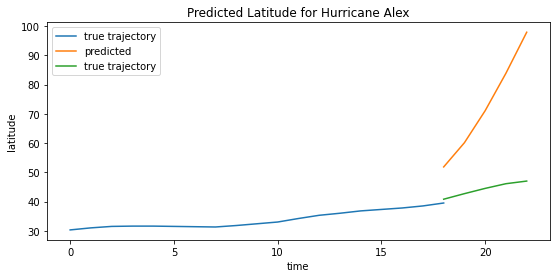

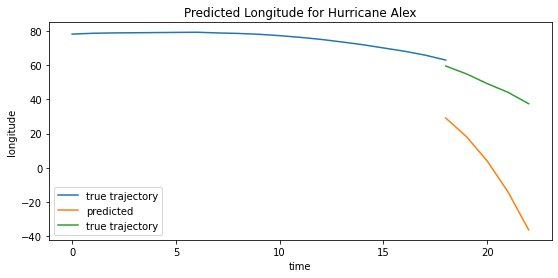

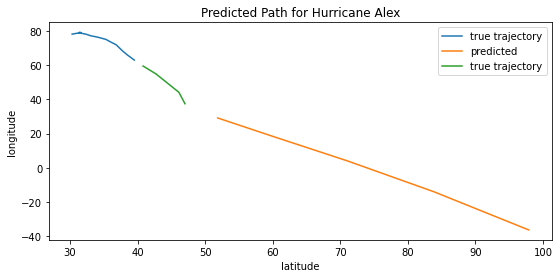

In [134]:
#convert time to quarters of the day
time = []
time_ = atlantic[0]['Time'][1:]
for t in time_:
    if t==' 0000':
        time.append('Q1') 
    elif t==' 0600':
        time.append('Q2')
    elif t==' 1200':
        time.append('Q3')
    elif t==' 1800':
        time.append('Q4')
date = list(atlantic[0]['Date'][1:])
dates = pd.DataFrame(date) + pd.DataFrame(time)
# print(str(quarterly))
# # html = response.read().decode('utf-8')
# dates = dates_from_str(str(quarterly))
alex = atlantic[0][1:]
data = alex[['Latitude','Longitude']]
data.index = dates
model = VAR(data[:-5])

results = model.fit(2)
results.summary()

# results.plot()
lag_order = results.k_ar
predicted_vals = np.array(results.forecast(data.values[-lag_order:], 5))
plt.plot(np.arange(19), list(data['Latitude'][:-5]),label='true trajectory')
plt.plot(np.arange(18,23), predicted_vals[:,0],label='predicted')
plt.plot(np.arange(18,23), list(data['Latitude'][-5:]),label='true trajectory')
plt.title('Predicted Latitude for Hurricane Alex')
plt.xlabel('time')
plt.ylabel('latitude')
plt.legend()
plt.show()

plt.plot(np.arange(19), list(data['Longitude'][:-5]),label='true trajectory')
plt.plot(np.arange(18,23), predicted_vals[:,1],label='predicted')
plt.plot(np.arange(18,23), list(data['Longitude'][-5:]),label='true trajectory')
plt.title('Predicted Longitude for Hurricane Alex')
plt.xlabel('time')
plt.ylabel('longitude')
plt.legend()
plt.show()

plt.plot(list(data['Latitude'][:-5]), list(data['Longitude'][:-5]),label='true trajectory')
plt.plot(predicted_vals[:,0], predicted_vals[:,1],label='predicted')
plt.plot(list(data['Latitude'][-5:]), list(data['Longitude'][-5:]),label='true trajectory')
plt.title('Predicted Path for Hurricane Alex')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()


# plt.plot(np.arange(24-5), list(data['Longitude']))
# plt.plot(np.arange(23,28), predicted_vals[:,1])
# plt.title('Predicted Longitude for Hurricane Alex')
# plt.xlabel('time')
# plt.ylabel('longitude')
# plt.show()

# plt.plot(list(data['Latitude']), list(data['Longitude']))
# plt.plot(predicted_vals[:,0], predicted_vals[:,1])
# plt.title('Predicted Path for Hurricane Alex')
# plt.xlabel('latitude')
# plt.ylabel('longitude')
# plt.show()

2


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


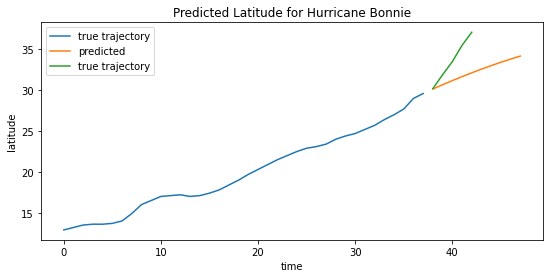

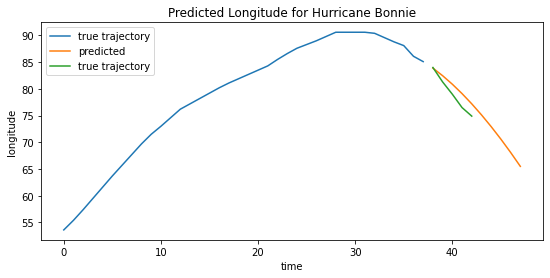

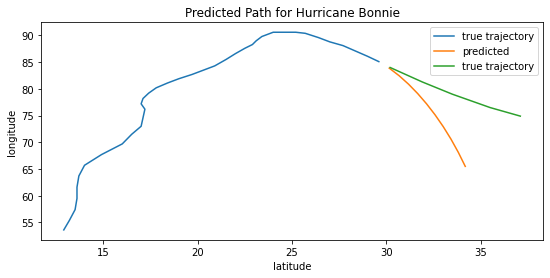

In [166]:
#convert time to quarters of the day
time = []
time_ = atlantic[1]['Time'][1:]
for t in time_:
    if t==' 0000':
        time.append('Q1') 
    elif t==' 0600':
        time.append('Q2')
    elif t==' 1200':
        time.append('Q3')
    elif t==' 1800':
        time.append('Q4')
date = list(atlantic[1]['Date'][1:])
dates = pd.DataFrame(date) + pd.DataFrame(time)
# print(str(quarterly))
# # html = response.read().decode('utf-8')
# dates = dates_from_str(str(quarterly))
alex = atlantic[1][1:]
data = alex[['Latitude','Longitude']]
data.index = dates
model = VAR(data[:-5])
results = model.fit(2)
results.summary()

# results.plot()
lag_order = results.k_ar
print(lag_order)
predicted_vals = np.array(results.forecast(data.values[:-5], 10))
plt.plot(np.arange(38), list(data['Latitude'][:-5]),label='true trajectory')
plt.plot(np.arange(38,48), predicted_vals[:,0],label='predicted')
plt.plot(np.arange(38,43), list(data['Latitude'][-5:]),label='true trajectory')
plt.title('Predicted Latitude for Hurricane Bonnie')
plt.xlabel('time')
plt.ylabel('latitude')
plt.legend()
plt.show()

plt.plot(np.arange(38), list(data['Longitude'][:-5]),label='true trajectory')
plt.plot(np.arange(38,48), predicted_vals[:,1],label='predicted')
plt.plot(np.arange(38,43), list(data['Longitude'][-5:]),label='true trajectory')
plt.title('Predicted Longitude for Hurricane Bonnie')
plt.xlabel('time')
plt.ylabel('longitude')
plt.legend()
plt.show()

plt.plot(list(data['Latitude'][:-5]), list(data['Longitude'][:-5]),label='true trajectory')
plt.plot(predicted_vals[:,0], predicted_vals[:,1],label='predicted')
plt.plot(list(data['Latitude'][-5:]), list(data['Longitude'][-5:]),label='true trajectory')
plt.title('Predicted Path for Hurricane Bonnie')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()


# plt.plot(np.arange(24-5), list(data['Longitude']))
# plt.plot(np.arange(23,28), predicted_vals[:,1])
# plt.title('Predicted Longitude for Hurricane Alex')
# plt.xlabel('time')
# plt.ylabel('longitude')
# plt.show()

# plt.plot(list(data['Latitude']), list(data['Longitude']))
# plt.plot(predicted_vals[:,0], predicted_vals[:,1])
# plt.title('Predicted Path for Hurricane Alex')
# plt.xlabel('latitude')
# plt.ylabel('longitude')
# plt.show()

In [170]:
import pickle
true_traj = (np.arange(38), list(data['Latitude'][:-5]))
projected_traj = (np.arange(38,43), predicted_vals[:,0])
true_project_traj = (np.arange(38,43), list(data['Latitude'][-5:]))
hurricane_name = "Bonnie"
dictionary = {}
dictionary[hurricane_name] = [true_traj, projected_traj, true_project_traj]
pickle.dump(dictionary, open('atlantic_chelsey1', 'wb'))
# pickle.dump(true_traj, open('hurricane_bonnie', 'wb'))
# pickle.dump(projected_traj, open('hurricane_bonnie', 'wb'))
# pickle.dump(true_project_traj, open('hurricane_bonnie', 'wb'))

In [171]:
true_traj = (np.arange(38), list(data['Longitude'][:-5]))
projected_traj = (np.arange(38,43), predicted_vals[:,0])
true_project_traj = (np.arange(38,43), list(data['Longitude'][-5:]))
hurricane_name = "Bonnie"
dictionary = {}
dictionary[hurricane_name] = [true_traj, projected_traj, true_project_traj]
pickle.dump(dictionary, open('atlantic_chelsey2', 'wb'))

In [172]:
true_traj = (list(data['Latitude'][:-5]), list(data['Longitude'][:-5]))
projected_traj = (predicted_vals[:,0], predicted_vals[:,1])
true_project_traj = (list(data['Latitude'][-5:]), list(data['Longitude'][-5:]))
hurricane_name = "Bonnie"
dictionary = {}
dictionary[hurricane_name] = [true_traj, projected_traj, true_project_traj]
pickle.dump(dictionary, open('atlantic_chelsey3', 'wb'))

In [141]:
atlantic[1]

,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS,Status WV
45193,AL022004,BONNIE,47.4,32.7,30,992,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45194,20040803,1200,12.9,53.6,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45195,20040803,1800,13.2,55.4,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45196,20040804,0000,13.5,57.4,30,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45197,20040804,0600,13.6,59.5,30,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45198,20040804,1200,13.6,61.6,30,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45199,20040804,1800,13.7,63.7,30,1010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45200,20040805,0000,14.0,65.7,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45201,20040805,0600,14.9,67.7,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45202,20040805,1200,16.0,69.7,25,1011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


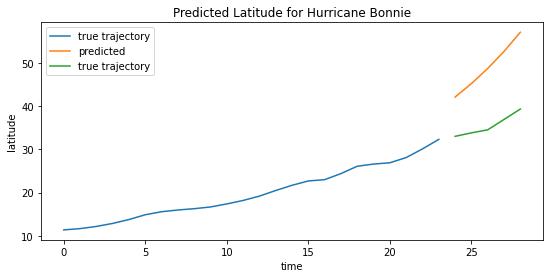

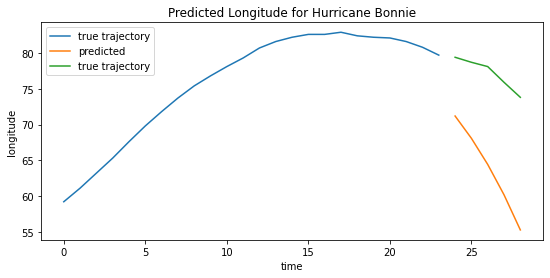

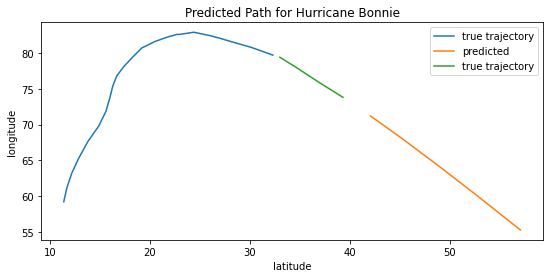

In [149]:
#convert time to quarters of the day
time = []
time_ = atlantic[2]['Time'][1:]
for t in time_:
    if t==' 0000':
        time.append('Q1') 
    elif t==' 0600':
        time.append('Q2')
    elif t==' 1200':
        time.append('Q3')
    elif t==' 1800':
        time.append('Q4')
date = list(atlantic[2]['Date'][1:])
dates = pd.DataFrame(date) + pd.DataFrame(time)
# print(str(quarterly))
# # html = response.read().decode('utf-8')
# dates = dates_from_str(str(quarterly))
alex = atlantic[2][1:]
data = alex[['Latitude','Longitude']]
data.index = dates
model = VAR(data[:-5])

results = model.fit(2)
results.summary()

# results.plot()
lag_order = results.k_ar
predicted_vals = np.array(results.forecast(data.values[-lag_order:],5))
plt.plot(np.arange(24), list(data['Latitude'][:-5]),label='true trajectory')
plt.plot(np.arange(24,29), predicted_vals[:,0],label='predicted')
plt.plot(np.arange(24,29), list(data['Latitude'][-5:]),label='true trajectory')
plt.title('Predicted Latitude for Hurricane Bonnie')
plt.xlabel('time')
plt.ylabel('latitude')
plt.legend()
plt.show()

plt.plot(np.arange(24), list(data['Longitude'][:-5]),label='true trajectory')
plt.plot(np.arange(24,29), predicted_vals[:,1],label='predicted')
plt.plot(np.arange(24,29), list(data['Longitude'][-5:]),label='true trajectory')
plt.title('Predicted Longitude for Hurricane Bonnie')
plt.xlabel('time')
plt.ylabel('longitude')
plt.legend()
plt.show()

plt.plot(list(data['Latitude'][:-5]), list(data['Longitude'][:-5]),label='true trajectory')
plt.plot(predicted_vals[:,0], predicted_vals[:,1],label='predicted')
plt.plot(list(data['Latitude'][-5:]), list(data['Longitude'][-5:]),label='true trajectory')
plt.title('Predicted Path for Hurricane Bonnie')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()


# plt.plot(np.arange(24-5), list(data['Longitude']))
# plt.plot(np.arange(23,28), predicted_vals[:,1])
# plt.title('Predicted Longitude for Hurricane Alex')
# plt.xlabel('time')
# plt.ylabel('longitude')
# plt.show()

# plt.plot(list(data['Latitude']), list(data['Longitude']))
# plt.plot(predicted_vals[:,0], predicted_vals[:,1])
# plt.title('Predicted Path for Hurricane Alex')
# plt.xlabel('latitude')
# plt.ylabel('longitude')
# plt.show()

In [86]:
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [87]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
print(quarterly)
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(np.array(quarterly))
print(quarterly)

0      1959Q1
1      1959Q2
2      1959Q3
3      1959Q4
4      1960Q1
        ...  
198    2008Q3
199    2008Q4
200    2009Q1
201    2009Q2
202    2009Q3
Length: 203, dtype: object
[datetime.datetime(1959, 3, 31, 0, 0), datetime.datetime(1959, 6, 30, 0, 0), datetime.datetime(1959, 9, 30, 0, 0), datetime.datetime(1959, 12, 31, 0, 0), datetime.datetime(1960, 3, 31, 0, 0), datetime.datetime(1960, 6, 30, 0, 0), datetime.datetime(1960, 9, 30, 0, 0), datetime.datetime(1960, 12, 31, 0, 0), datetime.datetime(1961, 3, 31, 0, 0), datetime.datetime(1961, 6, 30, 0, 0), datetime.datetime(1961, 9, 30, 0, 0), datetime.datetime(1961, 12, 31, 0, 0), datetime.datetime(1962, 3, 31, 0, 0), datetime.datetime(1962, 6, 30, 0, 0), datetime.datetime(1962, 9, 30, 0, 0), datetime.datetime(1962, 12, 31, 0, 0), datetime.datetime(1963, 3, 31, 0, 0), datetime.datetime(1963, 6, 30, 0, 0), datetime.datetime(1963, 9, 30, 0, 0), datetime.datetime(1963, 12, 31, 0, 0), datetime.datetime(1964, 3, 31, 0, 0), datetime.dateti

In [88]:
mdata = mdata[['realgdp','realcons','realinv']]
print(mdata)
mdata.index = pandas.DatetimeIndex(quarterly)
print(mdata)
data = np.log(mdata).diff().dropna()
print(data)

       realgdp  realcons   realinv
0     2710.349    1707.4   286.898
1     2778.801    1733.7   310.859
2     2775.488    1751.8   289.226
3     2785.204    1753.7   299.356
4     2847.699    1770.5   331.722
..         ...       ...       ...
198  13324.600    9267.7  1990.693
199  13141.920    9195.3  1857.661
200  12925.410    9209.2  1558.494
201  12901.504    9189.0  1456.678
202  12990.341    9256.0  1486.398

[203 rows x 3 columns]
              realgdp  realcons   realinv
1959-03-31   2710.349    1707.4   286.898
1959-06-30   2778.801    1733.7   310.859
1959-09-30   2775.488    1751.8   289.226
1959-12-31   2785.204    1753.7   299.356
1960-03-31   2847.699    1770.5   331.722
...               ...       ...       ...
2008-09-30  13324.600    9267.7  1990.693
2008-12-31  13141.920    9195.3  1857.661
2009-03-31  12925.410    9209.2  1558.494
2009-06-30  12901.504    9189.0  1456.678
2009-09-30  12990.341    9256.0  1486.398

[203 rows x 3 columns]
             realgdp  realco